# 1. Looking at a Big Picture

What is Our Problem
Our problem is to predict whether the passenger with given set of characteristics will survive the crisis or not. We have to give answer the problem in Yes or No.

Select the Performance Measure
Our performance measure will be 'Accuracy'.
Accuracy = No. of correct predictions * 100/ Total number of predictions

Check the Assumptions
I) We are assuming that passenger will either survive or will die in the crisis. That is, the output will be binary only.

# 2. Get the Data

## 2.1 Import the Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2.2 Getting the training data

In [2]:
data = pd.read_csv('train.csv')

# 3. Explore the Data

In [7]:
df = data.copy()

## 3.1 Study each attribute and its characteristics

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

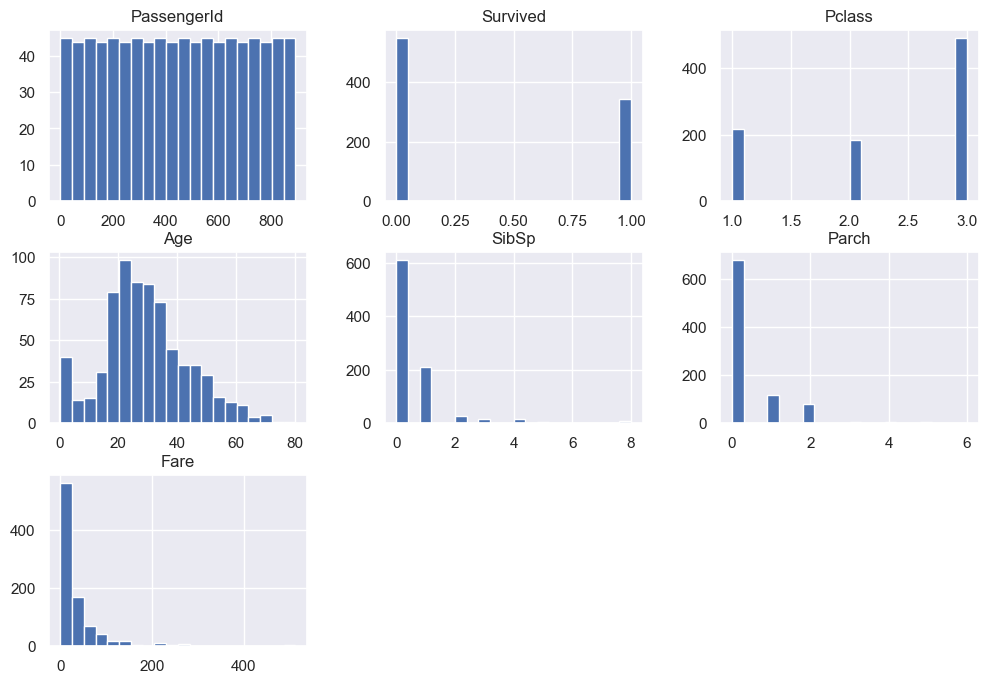

In [15]:
df.hist(bins=20, figsize=(12, 8))

PassengerId => 0 missing, uniform, Not useful

Survived => 0 missing, binary, Useful => Target variable

Pclass => 0 missing, categorical, Useful

Name => 0 missing, Not useful

Sex => 0 missing, categorical, Useful

Age => 177 missing, kind of normal but slight right skew, Useful

SibSp => 0 missing, right skew, Useful

Parch => 0 missing, right skew, Useful

Ticket => 0 missing, Not useful

Fare => 0 missing, right skewed, Useful

Cabin => 687 missing, Not useful

Embarked => 0 missing, Not useful

## 3.2 Study Correlation between attributes

In [20]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Survived => Fare (0.26)

Not much correlation problem can be seen

## 3.3 Some Conclusions

Target Variable => Survived

Useful => Pclass, Sex, Age, SibSp, Parch, Fare

We will do the median imputation for missing values

For Pclass, reverse the order of categories i.e change 1->3, 2->2 and 3->1 so that first class passengers have higher priority and so on

Correlation problems are not that enough, hence ignore

On Fare, we may use log or square root transformations